# Ray's Code for predicting heart attack risk

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns', None)

# Print the column names
print(df.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [2]:
class heart_attack_prediction_dataset:
    '''
    This class is made to work with the heart_attack_predictio_dataset.csv dataset.
    '''
    def load_clean(self, df_path):
        '''
        Load the dataset and clean it up
        
        CleaningDecisions:
        1. Seperate Systolic and Diastolic blood pressure into seperate columns 
        2. Create an interaction term between systolic and diastolic.
        3. Drop 'Sex_Male', 'Diet_Average', 'Country_Argentina' to prevent multicolinearity.
        4. Set categorical variables to category type.
        '''
        
        import pandas as pd
        import numpy as np

        df = pd.read_csv('heart_attack_prediction_dataset.csv')
        
        # Switch income to log income.
        Income = df['Income']
        df['Log Income'] = np.log(Income)

        # Set Categorical Variables
        categorical_variables = ['Sex', 'Diet', 'Country']

        for col in categorical_variables:
                df[col] = df[col].astype('category')

        ### One hot encode the categorical variables
        df = pd.get_dummies(df, columns=['Sex', 'Diet','Country'])
        # Drop to prevent multicolinearity with binary variables
        df = df.drop(['Sex_Male', 'Diet_Average', 'Country_Argentina'], axis=1)

        ### Seperate systolic and diastolic blood pressure into their own variables and create an interaction term.
        # Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
        df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

        # Drop for no need
        df = df.drop(['Patient ID', 'Blood Pressure', 'Income', 'Continent', 'Hemisphere'], axis=1)

        # Create interaction term by multiplying Systolic and Diastolic pressures
        df['BP_Interaction'] = df['Systolic'] * df['Diastolic']
        
        return df
    
    def normalize(self, df):
        '''
        Normalize the features in the dataframe.
        '''
        df - self.scaler.fit_transform(df)
        return df
        
    def split(self, X, y):
        '''
        Split the data into training and testing sets.
        '''
        #print(list(df.columns))
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler

        # Separate the target variable (y) and the features (X)
        X = df.drop('Heart Attack Risk', axis=1)
        y = df['Heart Attack Risk']

        # Normalize the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

        print("Object type of current x and y variables:", type(X_train))
        print("Shape of X_train:", X_train.shape)
        print("Shape of X_test:", X_test.shape)
        print("Shape of y_train:", y_train.shape)
        print("Shape of y_test:", y_test.shape)
        return X_train, X_test, y_train, y_test

First Clean the data.

Then choose what to predict.

In [3]:
'''
clean the dataset
'''

# Switch income to log income.
Income = df['Income']
df['Log Income'] = np.log(Income)

# Set Categorical Variables
categorical_variables = ['Sex', 'Diet', 'Country']

for col in categorical_variables:
        df[col] = df[col].astype('category')
        
### One hot encode the categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Diet','Country'])
# Drop to prevent multicolinearity with binary variables
df = df.drop(['Sex_Male', 'Diet_Average', 'Country_Argentina'], axis=1)

### Seperate systolic and diastolic blood pressure into their own variables and create an interaction term.
# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop for no need
df = df.drop(['Patient ID', 'Blood Pressure', 'Income', 'Continent', 'Hemisphere'], axis=1)

# Create interaction term by multiplying Systolic and Diastolic pressures
df['BP_Interaction'] = df['Systolic'] * df['Diastolic']

print(list(df.columns))
df

['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Log Income', 'Sex_Female', 'Diet_Healthy', 'Diet_Unhealthy', 'Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Colombia', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan', 'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa', 'Country_South Korea', 'Country_Spain', 'Country_Thailand', 'Country_United Kingdom', 'Country_United States', 'Country_Vietnam', 'Systolic', 'Diastolic', 'BP_Interaction']


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Log Income,Sex_Female,Diet_Healthy,Diet_Unhealthy,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Systolic,Diastolic,BP_Interaction
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,31.251233,286,0,6,0,12.473822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,88,13904
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,27.194973,235,1,7,0,12.562936,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165,93,15345
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,28.176571,587,4,4,0,12.368540,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,174,99,17226
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,36.464704,378,3,4,0,11.741176,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,100,16300
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,21.809144,231,1,5,0,11.986392,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,91,88,8008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,19.655895,67,7,7,0,12.369126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94,76,7144
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,23.993866,617,4,9,0,12.291704,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,102,16014
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,35.406146,527,4,4,1,10.518619,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,75,12075
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,27.294020,114,2,8,0,12.254591,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,67,7973


# Predict Heart Attack Risk

## Split Data to x and y train and test sets

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the target variable (y) and the features (X)
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

print("Object type of current x and y variables:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Object type of current x and y variables: <class 'pandas.core.frame.DataFrame'>
Shape of X_train: (7010, 43)
Shape of X_test: (1753, 43)
Shape of y_train: (7010,)
Shape of y_test: (1753,)


## Model Benchmark

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd  

# Convert from numpy arrays or pandas DataFrames to PyTorch Tensors
X_train = torch.tensor(X_train.values.astype(np.float32)) if isinstance(X_train, pd.DataFrame) else torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64)) if isinstance(y_train, pd.Series) else torch.tensor(y_train.astype(np.int64))
X_test = torch.tensor(X_test.values.astype(np.float32)) if isinstance(X_test, pd.DataFrame) else torch.tensor(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64)) if isinstance(y_test, pd.Series) else torch.tensor(y_test.astype(np.int64))

# Define datasets and DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Validation dataset shape:", X_test.shape, y_test.shape)
print("Training dataset type:", type(X_train), type(y_train))
print("Validation dataset type:", type(X_test), type(y_test))

def calculate_accuracy(model, data_loader):
    model.eval()  # Set model to evaluation mode

    predictions, actuals = [], []
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            predicted_classes = torch.sigmoid(outputs).round()
            predictions.extend(predicted_classes.numpy().flatten())
            actuals.extend(targets.numpy())

    accuracy = accuracy_score(actuals, predictions)
    return accuracy

Training dataset shape: torch.Size([7010, 43]) torch.Size([7010])
Validation dataset shape: torch.Size([1753, 43]) torch.Size([1753])
Training dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>
Validation dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>


### Elastic Net

{'accuracy': 0.6354820308043354, 'best_lambda': 100.0, 'best_l1_ratio': 0.09999999999999999}


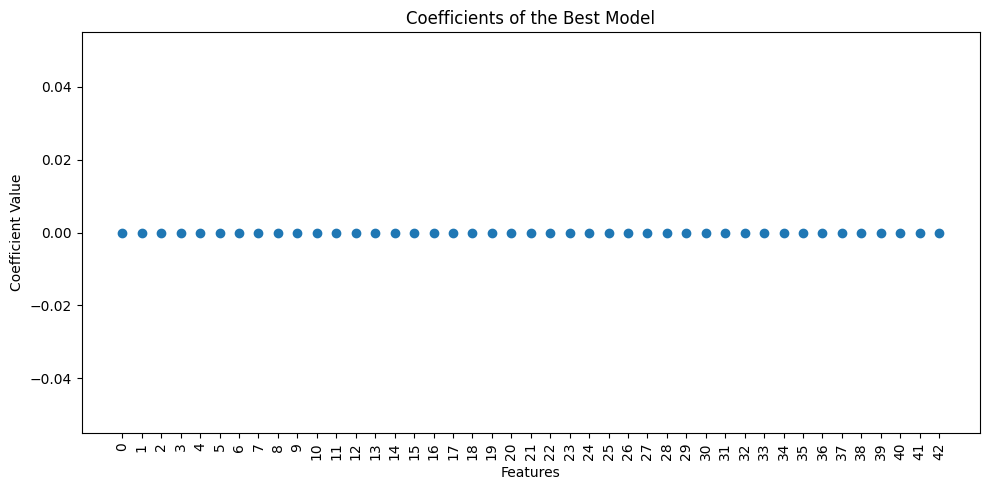

In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def elastic_net_search(X_train, y_train, X_test, y_test, threshold=0.5):
    # Setup ElasticNetCV with more iterations
    model = ElasticNetCV(cv=5, l1_ratio=np.linspace(0.01, 1, 100), alphas=np.logspace(-6, 2, 100),
                         max_iter=5000, tol=0.0001, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Binarize predictions based on a threshold
    y_pred_binarized = (y_pred > threshold).astype(int)
    
    # Calculating Accuracy
    accuracy = accuracy_score(y_test, y_pred_binarized)
    
    results = {
        'accuracy': accuracy,
        'best_lambda': model.alpha_,
        'best_l1_ratio': model.l1_ratio_
    }
    
    return results

results = elastic_net_search(X_train, y_train, X_test, y_test)
print(results)

# Plotting coefficients of the best model
best_model = ElasticNetCV(cv=5, l1_ratio=results['best_l1_ratio'], alphas=[results['best_lambda']],
                          max_iter=5000, tol=0.01, random_state=42)

best_model.fit(X_train, y_train)
coefficients = best_model.coef_

plt.figure(figsize=(10, 5))
plt.plot(coefficients, marker='o', linestyle='none')
plt.title('Coefficients of the Best Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(ticks=np.arange(len(coefficients)), rotation=90)
plt.tight_layout()
plt.show()

### SVM w RBF

In [9]:
from sklearn.svm import SVC

# SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with RBF kernel: {accuracy}')

Accuracy of SVM with RBF kernel: 0.6354820308043354


### Linear Regression

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Output is a single value

    def forward(self, x):
        return self.linear(x)

# Model setup
model = LinearRegressionModel(input_dim=43)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')

Epoch 1, Loss: 15476.574545565518
Epoch 1, Loss: 15476.574545565518, Val Accuracy: 63.55%
Epoch 2, Loss: 15555.275781666149, Val Accuracy: 36.45%
Epoch 3, Loss: 16410.4976340554, Val Accuracy: 63.55%
Epoch 4, Loss: 16208.423073785956, Val Accuracy: 63.55%
Epoch 5, Loss: 15581.428387451171, Val Accuracy: 63.55%
Epoch 6, Loss: 15346.040219809793, Val Accuracy: 36.45%
Epoch 7, Loss: 14893.137850015813, Val Accuracy: 63.55%
Epoch 8, Loss: 15209.295749282837, Val Accuracy: 36.45%
Epoch 9, Loss: 15300.02749411843, Val Accuracy: 36.45%
Epoch 10, Loss: 15642.634644664418, Val Accuracy: 63.55%


### Neural Network

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct / total

input_dim = 43  # Number of input features
num_classes = 2  # Number of output classes

nn_model = SimpleNN(input_dim, num_classes)
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 10

for epoch in range(epochs):
    nn_model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = nn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(nn_model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')


Epoch 1, Loss: 32.007482101158665, Val Accuracy: 52.37%
Epoch 2, Loss: 1.2882427497343583, Val Accuracy: 63.43%
Epoch 3, Loss: 0.8545423670248552, Val Accuracy: 63.43%
Epoch 4, Loss: 0.7618756976994601, Val Accuracy: 63.43%
Epoch 5, Loss: 0.73295074430379, Val Accuracy: 63.43%
Epoch 6, Loss: 0.7067302958531814, Val Accuracy: 63.43%
Epoch 7, Loss: 0.6829167664051056, Val Accuracy: 63.43%
Epoch 8, Loss: 0.6951531486077742, Val Accuracy: 63.43%
Epoch 9, Loss: 0.6675323004072363, Val Accuracy: 63.43%
Epoch 10, Loss: 0.6683717781847174, Val Accuracy: 63.43%


### Transformer Network

In [30]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Define the transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, num_classes):
        super(TransformerModel, self).__init__()
        encoder_layers = TransformerEncoderLayer(input_dim, num_heads, hidden_dim)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
input_dim = 43
hidden_dim = 128
num_layers = 1
num_heads = 1
num_classes = 1
num_epochs = 10
learning_rate = 0.001

# Create an instance of the transformer model
model = TransformerModel(input_dim, hidden_dim, num_layers, num_heads, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.unsqueeze(1)  # Add an extra dimension for sequence length
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target.float())
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            data = data.unsqueeze(1)  # Add an extra dimension for sequence length
            output = model(data)
            predicted = torch.round(torch.sigmoid(output)).squeeze()
            total += target.size(0)
            correct += (predicted == target).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")

C:\Users\raywz\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Validation Accuracy: 63.43%
Epoch [2/10], Validation Accuracy: 63.43%
Epoch [3/10], Validation Accuracy: 63.43%
Epoch [4/10], Validation Accuracy: 63.43%
Epoch [5/10], Validation Accuracy: 63.43%
Epoch [6/10], Validation Accuracy: 63.43%
Epoch [7/10], Validation Accuracy: 63.43%
Epoch [8/10], Validation Accuracy: 63.43%
Epoch [9/10], Validation Accuracy: 63.43%
Epoch [10/10], Validation Accuracy: 63.43%


# Predict Previous Heart Attack

## Split Data to x and y train and test sets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the target variable (y) and the features (X)
X = df.drop('Previous Heart Problems', axis=1)
y = df['Previous Heart Problems']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

print("Object type of current x and y variables:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
df

Object type of current x and y variables: <class 'numpy.ndarray'>
Shape of X_train: (7010, 43)
Shape of X_test: (1753, 43)
Shape of y_train: (7010,)
Shape of y_test: (1753,)


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Log Income,Sex_Female,Diet_Healthy,Diet_Unhealthy,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Systolic,Diastolic,BP_Interaction
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,31.251233,286,0,6,0,12.473822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,88,13904
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,27.194973,235,1,7,0,12.562936,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165,93,15345
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,28.176571,587,4,4,0,12.368540,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,174,99,17226
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,36.464704,378,3,4,0,11.741176,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,100,16300
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,21.809144,231,1,5,0,11.986392,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,91,88,8008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,19.655895,67,7,7,0,12.369126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94,76,7144
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,23.993866,617,4,9,0,12.291704,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,102,16014
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,35.406146,527,4,4,1,10.518619,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,75,12075
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,27.294020,114,2,8,0,12.254591,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,67,7973


## Model Benchmark

In [6]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd  

# Convert from numpy arrays or pandas DataFrames to PyTorch Tensors
X_train = torch.tensor(X_train.values.astype(np.float32)) if isinstance(X_train, pd.DataFrame) else torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64)) if isinstance(y_train, pd.Series) else torch.tensor(y_train.astype(np.int64))
X_test = torch.tensor(X_test.values.astype(np.float32)) if isinstance(X_test, pd.DataFrame) else torch.tensor(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64)) if isinstance(y_test, pd.Series) else torch.tensor(y_test.astype(np.int64))

# Define datasets and DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Validation dataset shape:", X_test.shape, y_test.shape)
print("Training dataset type:", type(X_train), type(y_train))
print("Validation dataset type:", type(X_test), type(y_test))

def calculate_accuracy(model, data_loader):
    model.eval()  # Set model to evaluation mode

    predictions, actuals = [], []
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            predicted_classes = torch.sigmoid(outputs).round()
            predictions.extend(predicted_classes.numpy().flatten())
            actuals.extend(targets.numpy())

    accuracy = accuracy_score(actuals, predictions)
    return accuracy

Training dataset shape: torch.Size([7010, 43]) torch.Size([7010])
Validation dataset shape: torch.Size([1753, 43]) torch.Size([1753])
Training dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>
Validation dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>


### Elastic Net

{'accuracy': 0.5128351397604107, 'best_lambda': 100.0, 'best_l1_ratio': 0.01}


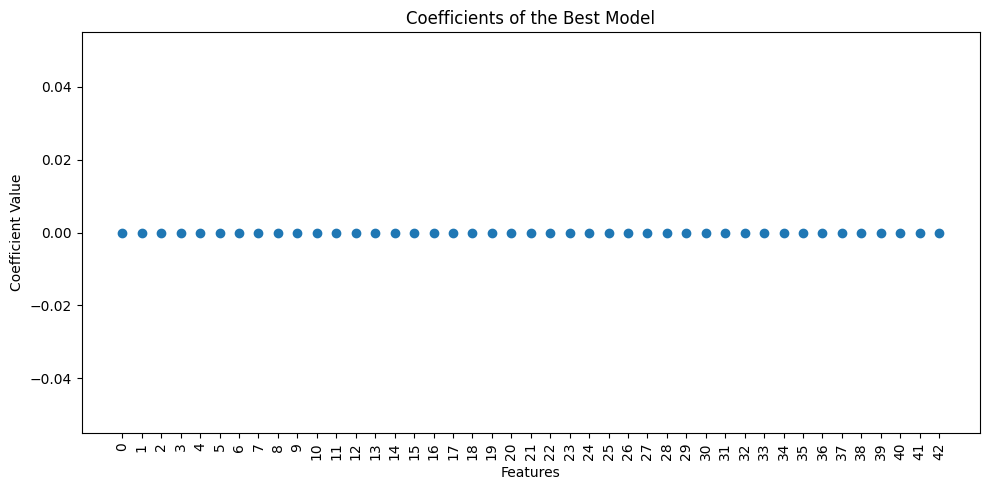

In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def elastic_net_search(X_train, y_train, X_test, y_test, threshold=0.5):
    # Setup ElasticNetCV with more iterations
    model = ElasticNetCV(cv=5, l1_ratio=np.linspace(0.01, 1, 100), alphas=np.logspace(-6, 2, 100),
                         max_iter=5000, tol=0.0001, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Binarize predictions based on a threshold
    y_pred_binarized = (y_pred > threshold).astype(int)
    
    # Calculating Accuracy
    accuracy = accuracy_score(y_test, y_pred_binarized)
    
    results = {
        'accuracy': accuracy,
        'best_lambda': model.alpha_,
        'best_l1_ratio': model.l1_ratio_
    }
    
    return results

results = elastic_net_search(X_train, y_train, X_test, y_test)
print(results)

# Plotting coefficients of the best model
best_model = ElasticNetCV(cv=5, l1_ratio=results['best_l1_ratio'], alphas=[results['best_lambda']],
                          max_iter=5000, tol=0.01, random_state=42)

best_model.fit(X_train, y_train)
coefficients = best_model.coef_

plt.figure(figsize=(10, 5))
plt.plot(coefficients, marker='o', linestyle='none')
plt.title('Coefficients of the Best Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(ticks=np.arange(len(coefficients)), rotation=90)
plt.tight_layout()
plt.show()

### SVM w RBF

In [8]:
from sklearn.svm import SVC

# SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with RBF kernel: {accuracy}')

Accuracy of SVM with RBF kernel: 0.4980034227039361


### Linear Regression

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Output is a single value

    def forward(self, x):
        return self.linear(x)

# Model setup
model = LinearRegressionModel(input_dim=43)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')

Epoch 1, Loss: 0.7508288096297872
Epoch 1, Loss: 0.7508288096297872, Val Accuracy: 47.29%
Epoch 2, Loss: 0.7481482738798315, Val Accuracy: 47.40%
Epoch 3, Loss: 0.7446022375063462, Val Accuracy: 47.40%
Epoch 4, Loss: 0.7414518448439511, Val Accuracy: 47.29%
Epoch 5, Loss: 0.7388457444581118, Val Accuracy: 47.35%
Epoch 6, Loss: 0.7357590886679563, Val Accuracy: 47.23%
Epoch 7, Loss: 0.7330843914638866, Val Accuracy: 47.52%
Epoch 8, Loss: 0.730310612375086, Val Accuracy: 47.52%
Epoch 9, Loss: 0.728524185852571, Val Accuracy: 47.46%
Epoch 10, Loss: 0.725964110547846, Val Accuracy: 47.46%


### Neural Network

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct / total

input_dim = 43  # Number of input features
num_classes = 2  # Number of output classes

nn_model = SimpleNN(input_dim, num_classes)
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 10

for epoch in range(epochs):
    nn_model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = nn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(nn_model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')


Epoch 1, Loss: 0.6998896820978685, Val Accuracy: 48.89%
Epoch 2, Loss: 0.6943886588920246, Val Accuracy: 50.20%
Epoch 3, Loss: 0.6916777366941625, Val Accuracy: 49.86%
Epoch 4, Loss: 0.692112800208005, Val Accuracy: 48.89%
Epoch 5, Loss: 0.6898559234359047, Val Accuracy: 51.00%
Epoch 6, Loss: 0.6907977093349803, Val Accuracy: 50.20%
Epoch 7, Loss: 0.6898958319967443, Val Accuracy: 49.63%
Epoch 8, Loss: 0.6876119597391649, Val Accuracy: 50.37%
Epoch 9, Loss: 0.6866753090511669, Val Accuracy: 50.09%
Epoch 10, Loss: 0.6872641509229487, Val Accuracy: 48.89%


### Transformer Network

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Define the transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, num_classes):
        super(TransformerModel, self).__init__()
        encoder_layers = TransformerEncoderLayer(input_dim, num_heads, hidden_dim)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
input_dim = 43
hidden_dim = 128
num_layers = 1
num_heads = 1
num_classes = 1
num_epochs = 10
learning_rate = 0.001

# Create an instance of the transformer model
model = TransformerModel(input_dim, hidden_dim, num_layers, num_heads, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.unsqueeze(1)  # Add an extra dimension for sequence length
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target.float())
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            data = data.unsqueeze(1)  # Add an extra dimension for sequence length
            output = model(data)
            predicted = torch.round(torch.sigmoid(output)).squeeze()
            total += target.size(0)
            correct += (predicted == target).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")

C:\Users\raywz\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Validation Accuracy: 49.00%
Epoch [2/10], Validation Accuracy: 48.94%
Epoch [3/10], Validation Accuracy: 48.37%
Epoch [4/10], Validation Accuracy: 49.23%
Epoch [5/10], Validation Accuracy: 50.83%
Epoch [6/10], Validation Accuracy: 50.88%
Epoch [7/10], Validation Accuracy: 49.46%
Epoch [8/10], Validation Accuracy: 50.94%
Epoch [9/10], Validation Accuracy: 49.34%
Epoch [10/10], Validation Accuracy: 50.54%


# Predict Stress Level

## Split Data to x and y train and test sets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the target variable (y) and the features (X)
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

print("Object type of current x and y variables:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
df

Object type of current x and y variables: <class 'numpy.ndarray'>
Shape of X_train: (7010, 43)
Shape of X_test: (1753, 43)
Shape of y_train: (7010,)
Shape of y_test: (1753,)


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Log Income,Sex_Female,Diet_Healthy,Diet_Unhealthy,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Colombia,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_New Zealand,Country_Nigeria,Country_South Africa,Country_South Korea,Country_Spain,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Systolic,Diastolic,BP_Interaction
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,31.251233,286,0,6,0,12.473822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,88,13904
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,27.194973,235,1,7,0,12.562936,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,165,93,15345
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,28.176571,587,4,4,0,12.368540,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,174,99,17226
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,36.464704,378,3,4,0,11.741176,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,100,16300
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,21.809144,231,1,5,0,11.986392,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,91,88,8008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,19.655895,67,7,7,0,12.369126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,94,76,7144
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,23.993866,617,4,9,0,12.291704,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,102,16014
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,35.406146,527,4,4,1,10.518619,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,75,12075
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,27.294020,114,2,8,0,12.254591,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,67,7973


## Model Benchmark

In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd  

# Convert from numpy arrays or pandas DataFrames to PyTorch Tensors
X_train = torch.tensor(X_train.values.astype(np.float32)) if isinstance(X_train, pd.DataFrame) else torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64)) if isinstance(y_train, pd.Series) else torch.tensor(y_train.astype(np.int64))
X_test = torch.tensor(X_test.values.astype(np.float32)) if isinstance(X_test, pd.DataFrame) else torch.tensor(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64)) if isinstance(y_test, pd.Series) else torch.tensor(y_test.astype(np.int64))

# Define datasets and DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Validation dataset shape:", X_test.shape, y_test.shape)
print("Training dataset type:", type(X_train), type(y_train))
print("Validation dataset type:", type(X_test), type(y_test))

def calculate_accuracy(model, data_loader):
    model.eval()  # Set model to evaluation mode

    predictions, actuals = [], []
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            predicted_classes = torch.sigmoid(outputs).round()
            predictions.extend(predicted_classes.numpy().flatten())
            actuals.extend(targets.numpy())

    accuracy = accuracy_score(actuals, predictions)
    return accuracy

Training dataset shape: torch.Size([7010, 43]) torch.Size([7010])
Validation dataset shape: torch.Size([1753, 43]) torch.Size([1753])
Training dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>
Validation dataset type: <class 'torch.Tensor'> <class 'torch.Tensor'>


### Elastic Net

{'accuracy': 0.09583571021106674, 'best_lambda': 0.10235310218990269, 'best_l1_ratio': 0.8400000000000001}


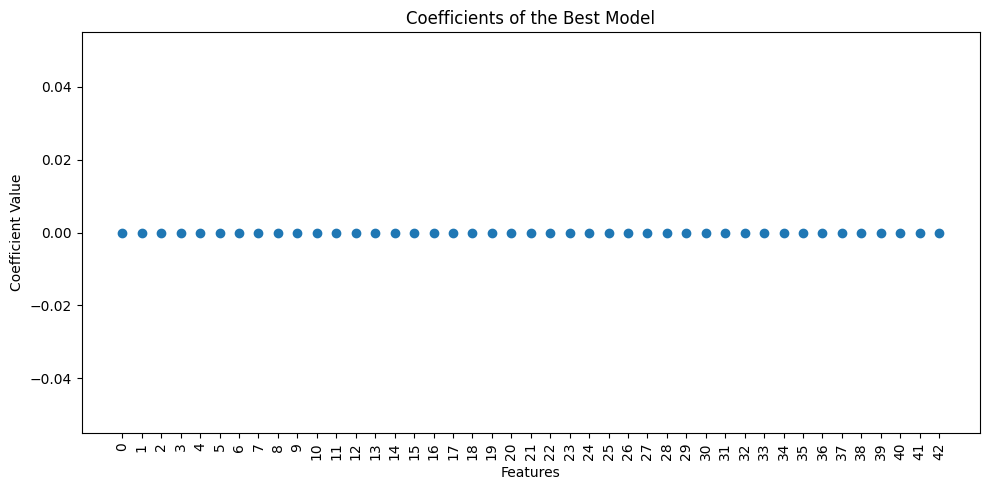

In [6]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def elastic_net_search(X_train, y_train, X_test, y_test, threshold=0.5):
    # Setup ElasticNetCV with more iterations
    model = ElasticNetCV(cv=5, l1_ratio=np.linspace(0.01, 1, 100), alphas=np.logspace(-6, 2, 100),
                         max_iter=5000, tol=0.0001, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Binarize predictions based on a threshold
    y_pred_binarized = (y_pred > threshold).astype(int)
    
    # Calculating Accuracy
    accuracy = accuracy_score(y_test, y_pred_binarized)
    
    results = {
        'accuracy': accuracy,
        'best_lambda': model.alpha_,
        'best_l1_ratio': model.l1_ratio_
    }
    
    return results

results = elastic_net_search(X_train, y_train, X_test, y_test)
print(results)

# Plotting coefficients of the best model
best_model = ElasticNetCV(cv=5, l1_ratio=results['best_l1_ratio'], alphas=[results['best_lambda']],
                          max_iter=5000, tol=0.01, random_state=42)

best_model.fit(X_train, y_train)
coefficients = best_model.coef_

plt.figure(figsize=(10, 5))
plt.plot(coefficients, marker='o', linestyle='none')
plt.title('Coefficients of the Best Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(ticks=np.arange(len(coefficients)), rotation=90)
plt.tight_layout()
plt.show()

### SVM w RBF

In [7]:
from sklearn.svm import SVC

# SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with RBF kernel: {accuracy}')

Accuracy of SVM with RBF kernel: 0.10439247005134056


### Linear Regression

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Output is a single value

    def forward(self, x):
        return self.linear(x)

# Model setup
model = LinearRegressionModel(input_dim=43)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.view(-1, 1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')

Epoch 1, Loss: -0.018451529504223303
Epoch 1, Loss: -0.018451529504223303, Val Accuracy: 7.64%
Epoch 2, Loss: -2.649070114439184, Val Accuracy: 9.13%
Epoch 3, Loss: -5.160258707133207, Val Accuracy: 9.58%
Epoch 4, Loss: -7.578180144049904, Val Accuracy: 9.58%
Epoch 5, Loss: -9.927314871007747, Val Accuracy: 9.58%
Epoch 6, Loss: -12.220458056709983, Val Accuracy: 9.58%
Epoch 7, Loss: -14.490540677850897, Val Accuracy: 9.58%
Epoch 8, Loss: -16.747704219818115, Val Accuracy: 9.58%
Epoch 9, Loss: -18.964626919139516, Val Accuracy: 9.58%
Epoch 10, Loss: -21.19280053919012, Val Accuracy: 9.58%


### Neural Network

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct / total

input_dim = 43  # Number of input features
num_classes = 2  # Number of output classes

nn_model = SimpleNN(input_dim, num_classes)
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 10

for epoch in range(epochs):
    nn_model.train()
    total_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = nn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Calculate Accuracy on validation set after each epoch
    val_accuracy = calculate_accuracy(nn_model, val_loader)
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Val Accuracy: {val_accuracy * 100:.2f}%')


IndexError: Target 3 is out of bounds.

### Transformer Network

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Define the transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, num_classes):
        super(TransformerModel, self).__init__()
        encoder_layers = TransformerEncoderLayer(input_dim, num_heads, hidden_dim)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.fc(x[:, -1, :])
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
input_dim = 43
hidden_dim = 128
num_layers = 1
num_heads = 1
num_classes = 1
num_epochs = 10
learning_rate = 0.001

# Create an instance of the transformer model
model = TransformerModel(input_dim, hidden_dim, num_layers, num_heads, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.unsqueeze(1)  # Add an extra dimension for sequence length
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target.float())
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            data = data.unsqueeze(1)  # Add an extra dimension for sequence length
            output = model(data)
            predicted = torch.round(torch.sigmoid(output)).squeeze()
            total += target.size(0)
            correct += (predicted == target).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")

C:\Users\raywz\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Validation Accuracy: 9.58%
Epoch [2/10], Validation Accuracy: 9.58%
Epoch [3/10], Validation Accuracy: 9.58%
Epoch [4/10], Validation Accuracy: 9.58%
Epoch [5/10], Validation Accuracy: 9.58%
Epoch [6/10], Validation Accuracy: 9.58%
Epoch [7/10], Validation Accuracy: 9.58%
Epoch [8/10], Validation Accuracy: 9.58%
Epoch [9/10], Validation Accuracy: 9.58%
Epoch [10/10], Validation Accuracy: 9.58%
